In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

In [2]:
carson_ds = xr.open_dataset('sg194_Carson_Shilshole_Overnight_timeseries.nc')

depth = carson_ds.depth.values
dive_ids = carson_ds.sg_data_point_dive_number.values
# stores the corrected depth
depth_corrected = depth.copy()

# unique dives in order
unique_dives = sorted(set(dive_ids))

# loop to get and apply offset
for d in unique_dives:
    # indices in sg_data_point belonging to this dive
    idx = (dive_ids == d)

    # first depth measurement in this dive
    offset = depth[idx][0]

    # apply correction
    depth_corrected[idx] = depth[idx] - offset

carson_ds["depth_corrected"] = (("sg_data_point",), depth_corrected)


C:\Users\lydia\Seagliders


<xarray.Dataset> Size: 1MB
Dimensions:                                   (gps_info: 66,
                                               sg_data_point: 7003,
                                               trajectory: 22, dive: 22)
Coordinates:
    time                                      (sg_data_point) datetime64[ns] 56kB ...
    ctd_time                                  (sg_data_point) datetime64[ns] 56kB ...
    ctd_depth                                 (sg_data_point) float32 28kB -6...
    latitude                                  (sg_data_point) float32 28kB 47...
    longitude                                 (sg_data_point) float32 28kB -1...
  * trajectory                                (trajectory) int32 88B 1 2 ... 22
Dimensions without coordinates: gps_info, sg_data_point, dive
Data variables: (12/69)
    gps_info_dive_number                      (gps_info) int32 264B ...
    sg_data_point_dive_number                 (sg_data_point) int32 28kB 1 .....
    log_gps_time                              (gps_info) datetime64[ns] 528B ...
    pressure                                  (sg_data_point) float32 28kB ...
    depth                                     (sg_data_point) float32 28kB -5...
    speed_gsm                                 (sg_data_point) float32 28kB ...
    ...                                        ...
    latlong_qc                                (dive) |S1 22B ...
    glider                                    |S12 12B ...
    depth_corrected                           (sg_data_point) float32 28kB 0....
    PAR_470nm                                 (sg_data_point) float32 28kB 40...
    particle_concentration_700nm              (sg_data_point) float32 28kB 11...
    chlorophyll_695nm                         (sg_data_point) float32 28kB 68...
Attributes: (12/48)
    project:                         Carson Shilshole Overnight
    title:                           Physical, chemical, and biological data ...
    summary:                         SG194 Carson Shilshole Overnight
    source:                          Seaglider SG194
    references:                      http://data.nodc.noaa.gov/accession/0092291
    processing_level:                1.12
    ...                              ...
    date_modified:                   2024-05-01T18:05:17Z
    uuid:                            c3645f26-07e6-11ef-a72f-f57473c7a252
    base_station_version:            3.0.2
    base_station_micro_version:      0
    quality_control_version:         1.12
    Conventions:                     CF-1.6

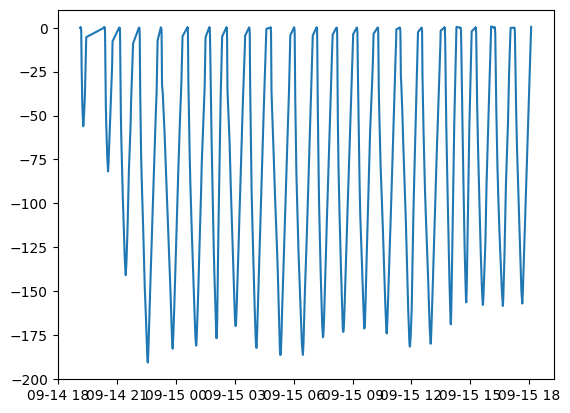

In [3]:
print(os.getcwd())
#Load the dataset


#Align time with sg_data_point and apply offset (if needed)
adjusted_time = pd.to_datetime(carson_ds['time'].values) + pd.DateOffset(years=0, months=0, days=0)

carson_ds['PAR_470nm'] = carson_ds['eng_wlbb2fl_sig470nm']
carson_ds['particle_concentration_700nm'] = carson_ds['eng_wlbb2fl_sig700nm']
carson_ds['chlorophyll_695nm'] = carson_ds['eng_wlbb2fl_sig695nm']

# add metadata
carson_ds['PAR_470nm'].attrs['pre_cleaning_name'] = 'eng_wlbb2fl_sig470nm'
carson_ds['particle_concentration_700nm'].attrs['pre_cleaning_name'] = 'eng_wlbb2fl_sig700nm'
carson_ds['chlorophyll_695nm'].attrs['pre_cleaning_name'] = 'eng_wlbb2fl_sig695nm'

carson_ds = carson_ds.assign_coords(time=('sg_data_point', adjusted_time))

#Select the relevant variables
new_carson_ds = carson_ds[['time', 'depth_corrected', 'latitude', 'longitude','temperature', 'salinity', 'dissolved_oxygen_sat', 'PAR_470nm', 'particle_concentration_700nm', 'chlorophyll_695nm']]

depth_sg = new_carson_ds['depth_corrected']
time_sg = new_carson_ds['time']

#plot to make sure
plt.plot(time_sg, -depth_sg)

#Convert to DataFrame and save
new_carson_ds.to_dataframe().reset_index().to_csv('sg194_Carson_timeseries_cleaned.csv', index=False)
new_carson_ds.to_netcdf('sg194_Carson_timeseries_cleaned.nc')
display(carson_ds)


In [4]:
carson_ds = xr.open_dataset('sg194_Carson_Shilshole_Overnight_timeseries.nc')

#Apply time apply offset (if needed)
adjusted_time = pd.to_datetime(carson_ds['time'].values) + pd.DateOffset(years=0, months=0, days=0)

carson_ds['U_DAC'] = carson_ds['depth_avg_curr_east']
carson_ds['V_DAC'] = carson_ds['depth_avg_curr_north']

# add metadata
carson_ds['U_DAC'].attrs['pre_cleaning_name'] = 'depth_avg_curr_east'
carson_ds['V_DAC'].attrs['pre_cleaning_name'] = 'depth_avg_curr_north'

#Select the relevant variables
new_carson_ds = carson_ds[['U_DAC', 'V_DAC', 'start_time', 'end_time', 'start_latitude', 'end_latitude', 'start_longitude', 'end_longitude']]
display(new_carson_ds)

#Convert to DataFrame and save
new_carson_ds.to_dataframe().reset_index().to_csv('sg194_Carson_DAC_timeseries_cleaned.csv', index=False)
new_carson_ds.to_netcdf('sg194_Carson_DAC_timeseries_cleaned.nc')


<xarray.Dataset> Size: 880B
Dimensions:          (dive: 22)
Dimensions without coordinates: dive
Data variables:
    U_DAC            (dive) float32 88B ...
    V_DAC            (dive) float32 88B ...
    start_time       (dive) datetime64[ns] 176B ...
    end_time         (dive) datetime64[ns] 176B ...
    start_latitude   (dive) float32 88B ...
    end_latitude     (dive) float32 88B ...
    start_longitude  (dive) float32 88B ...
    end_longitude    (dive) float32 88B ...
Attributes: (12/48)
    project:                         Carson Shilshole Overnight
    title:                           Physical, chemical, and biological data ...
    summary:                         SG194 Carson Shilshole Overnight
    source:                          Seaglider SG194
    references:                      http://data.nodc.noaa.gov/accession/0092291
    processing_level:                1.12
    ...                              ...
    date_modified:                   2024-05-01T18:05:17Z
    uuid:                            c3645f26-07e6-11ef-a72f-f57473c7a252
    base_station_version:            3.0.2
    base_station_micro_version:      0
    quality_control_version:         1.12
    Conventions:                     CF-1.6